In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


In [ ]:
np.random.seed(42)


In [ ]:
SIZE=1000
img_data=[]

img=cv2.imread('/content/sample_data/image (12).png', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 1000, 1000, 32)    896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 500, 500, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 500, 500, 8)       2312      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 250, 250, 8)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 250, 250, 8)       584       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 125, 125, 8)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 125, 125, 8)      

In [ ]:
model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)



Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0045 - accuracy: 0.8907
Epoch 2502/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.0045 - accuracy: 0.8898
Epoch 2503/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.0045 - accuracy: 0.8908
Epoch 2504/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0045 - accuracy: 0.8900
Epoch 2505/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.0044 - accuracy: 0.8910
Epoch 2506/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.0044 - accuracy: 0.8905
Epoch 2507/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0044 - accuracy: 0.8905
Epoch 2508/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0044 - accuracy: 0.8908
Epoch 2509/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0044 - accuracy: 0.8900
Epoch 2510/5000
1/1 [==========

In [ ]:
print("Neural network output")
pred = model.predict(img_array)

Neural network output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


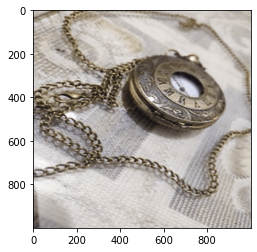

In [ ]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")


In [ ]:
plt.savefig('image.jpg')

files.download('image.jpg')

NameError: ignored

In [ ]:
with open('/content/gdrive/My Driveimage.jpg/', 'w') as f:
  f.write('content')

IsADirectoryError: ignored